In [1]:
"""
Approximation of functions in terms of taylor series

f(x) = sum [n=0..inf] of (nth derivative of f at point a) * (x-a) ** n / n!
"""

%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

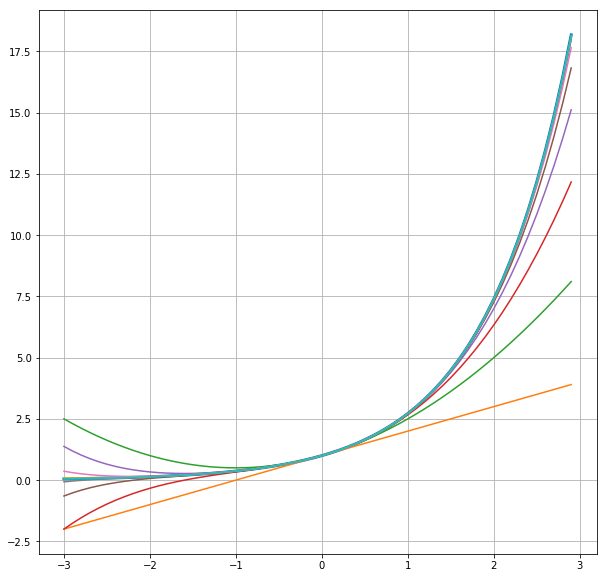

In [35]:
def factorial(n):
    res = 1
    for i in range(1, n+1):
        res *= i
    return res

def exponential_approx(xs, at, degree):
    ys = np.zeros(xs.shape)
    for i in range(degree+1):
        ys += np.exp(at) * (xs-at) ** i / factorial(i)
    return ys

xs = np.arange(-3, 3, 0.1)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(xs, np.exp(xs), lw=3)
for i in range(1, 10):
    ax.plot(xs, exponential_approx(xs, at=0, degree=i))
ax.grid(True, which='both')
plt.show()

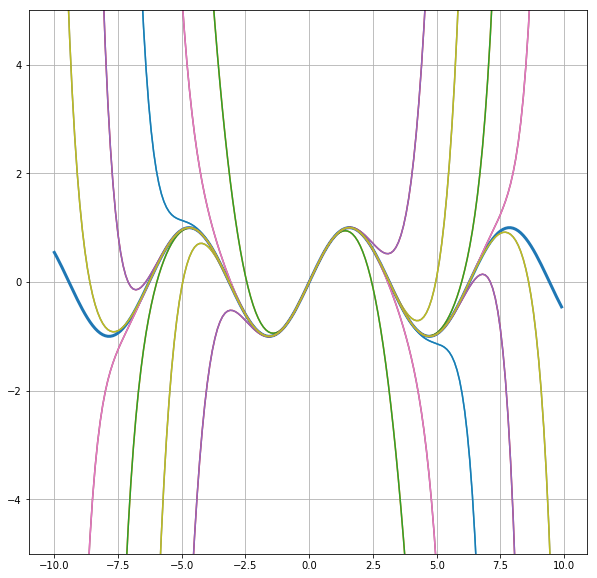

In [52]:
def sin_approx(xs, at, degree):
    derivatives = [lambda x: np.sin(x),
                   lambda x: np.cos(x),
                   lambda x: -np.sin(x),
                   lambda x: -np.cos(x)]
    
    ys = np.zeros(xs.shape)
    for i in range(degree+1):
        ys += derivatives[i%4](at) * (xs-at) ** i / factorial(i)
    return ys

xs = np.arange(-10, 10, 0.1)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(xs, np.sin(xs), lw=3)
for i in range(3, 21):
    ax.plot(xs, sin_approx(xs, at=0, degree=i))
ax.grid(True, which='both')
ax.set_ylim(-5, 5)
plt.show()

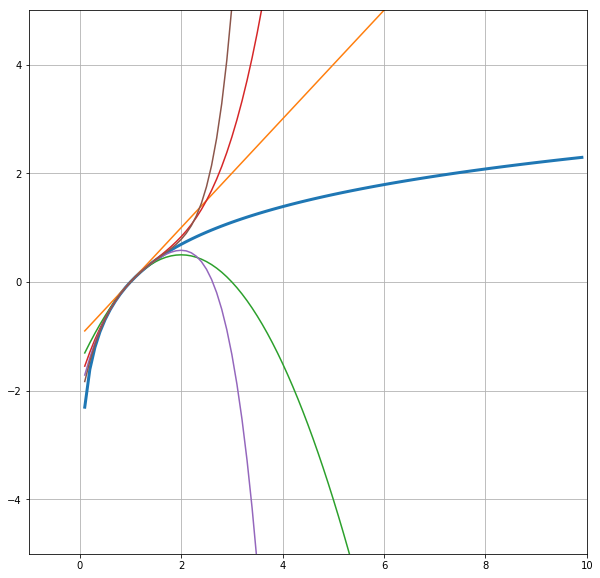

In [58]:
def ln_approx(xs, at, degree):
    derivatives = [lambda x: np.log(x),
                   lambda x: 1 / x,
                   lambda x: - 1 /x ** 2,
                   lambda x: 2 / x ** 3,
                   lambda x: - 6 / x ** 4,
                   lambda x: 24 / x ** 5,
                   lambda x: - 120 / x ** 6]
    
    ys = np.zeros(xs.shape)
    for i in range(degree+1):
        ys += derivatives[i](at) * (xs-at) ** i / factorial(i)
    return ys

xs = np.arange(0.1, 10, 0.1)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(xs, np.log(xs), lw=3)
for i in range(1, 6):
    ax.plot(xs, ln_approx(xs, at=1, degree=i))
ax.grid(True, which='both')
ax.set_xlim(-1, 10)
ax.set_ylim(-5, 5)
plt.show()